Classificação
=============


threshold (binária)
sigmoide = regrsão logística, progresso gradual , mas sempre enyre 0 e 1, avaliado como uma problabilidade
relu: recrified linear unit, uma das mais populares,
tanh hyperbolic tangent, vai d -1 a 1



## Imports

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error

from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

## Configs

In [ ]:
np.set_printoptions(suppress=True)
PLOT_WIDE = (14,7)

## Load data

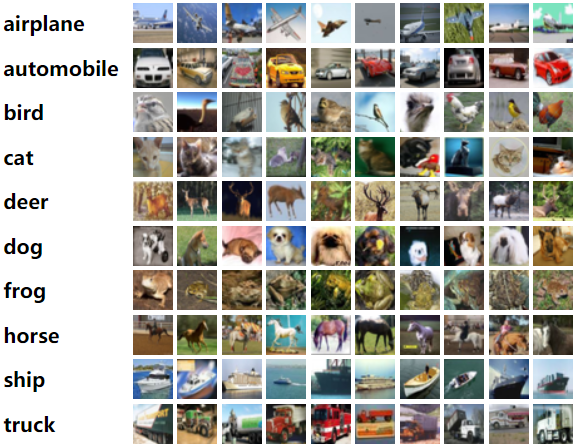

In [ ]:
# Load data from dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print('shape x_train: ', x_train.shape, ' características de treinamento 50k, matrizes 32x32 e 3 cores (RGB)')
print('shape x_test: ', x_test.shape, ' características de test 10k, matrizes 32x32 e 3 cores (RGB)')
print('sahpe y_test: ', y_test.shape, 'características do resultado, 1 dimensão, 10k')

shape x_train:  (50000, 32, 32, 3)  características de treinamento 50k, matrizes 32x32 e 3 cores (RGB)
shape x_test:  (10000, 32, 32, 3)  características de test 10k, matrizes 32x32 e 3 cores (RGB)
sahpe y_test:  (10000, 1) características do resultado, 1 dimensão, 10k


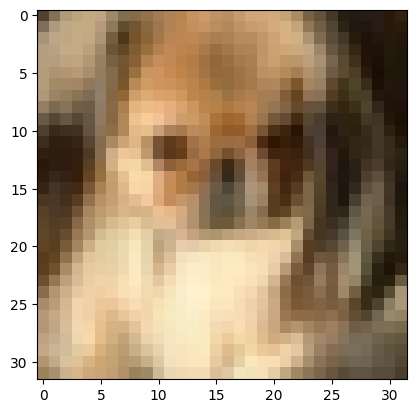

In [ ]:
# Escolhendo uma imagem para plotar
sample = np.random.randint(len(x_train)-1)
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

## 2. Pré-processamento

#### Normalização

In [ ]:
# divide items by max value
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [ ]:
# make binary categorization labels
hot = OneHotEncoder()
# '-1' get the length of array
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()



## 3. Particionamento de base de dados

In [ ]:
# get 20% from train set and and extract a new validation set
x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [ ]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(25,  input_dim = 784))
rede_simples.add(Activation('sigmoid'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

## 5. Definir otimizadores

In [ ]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [ ]:
#### 6. Treinamento
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

historico = rede_simples.fit(x_treino,
                             y_treino,
                             epochs = 30,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks=[es])

Epoch 1/30
1250/1250 [==============================] - 11s 7ms/step - loss: 2.0098 - accuracy: 0.2602 - val_loss: 1.8918 - val_accuracy: 0.3173
Epoch 2/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8546 - accuracy: 0.3274 - val_loss: 1.7940 - val_accuracy: 0.3387
Epoch 3/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.8005 - accuracy: 0.3487 - val_loss: 1.7843 - val_accuracy: 0.3453
Epoch 4/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7661 - accuracy: 0.3639 - val_loss: 1.7320 - val_accuracy: 0.3778
Epoch 5/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7454 - accuracy: 0.3739 - val_loss: 1.7586 - val_accuracy: 0.3653
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7230 - accuracy: 0.3859 - val_loss: 1.7519 - val_accuracy: 0.3674
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6985 - accuracy: 0.3961 - val_loss: 1.7046 - val_accuracy

## 7. Avaliação do modelo

In [ ]:
pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.4051

In [ ]:
y_test.argmax(1)

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
pred_simples.argmax(1)

array([3, 9, 8, ..., 5, 6, 7])

In [ ]:
pred_simples[1]

array([0.04811142, 0.26881856, 0.01246619, 0.01776802, 0.0105684 ,
       0.01104438, 0.0081087 , 0.00820677, 0.2608641 , 0.35404345],
      dtype=float32)

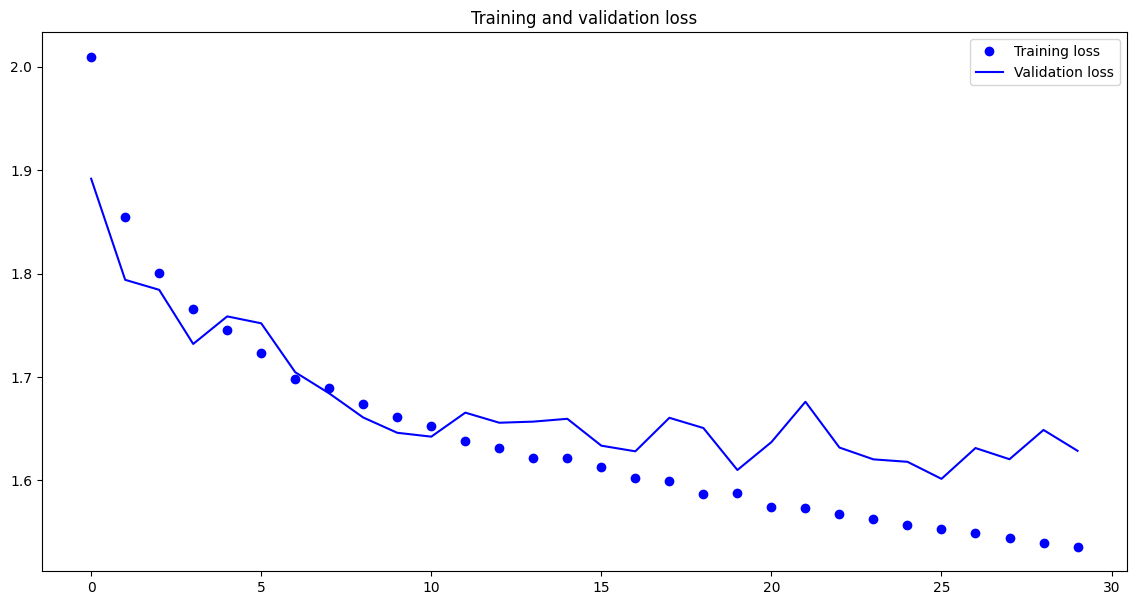

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))

plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [ ]:
# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)
historico = rede_simples.fit(x_treino,
                             y_treino,
                             epochs = 150,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5344 - accuracy: 0.4537 - val_loss: 1.6051 - val_accuracy: 0.4226
Epoch 2/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5307 - accuracy: 0.4527 - val_loss: 1.6009 - val_accuracy: 0.4325
Epoch 3/150
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5213 - accuracy: 0.4562 - val_loss: 1.6480 - val_accuracy: 0.4106
Epoch 4/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5208 - accuracy: 0.4550 - val_loss: 1.6018 - val_accuracy: 0.4265
Epoch 5/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5225 - accuracy: 0.4556 - val_loss: 1.6221 - val_accuracy: 0.4134
Epoch 6/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5215 - accuracy: 0.4577 - val_loss: 1.5940 - val_accuracy: 0.4307
Epoch 7/150
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5143 - accuracy: 0.4564 - val_loss: 1.5891 - val_ac

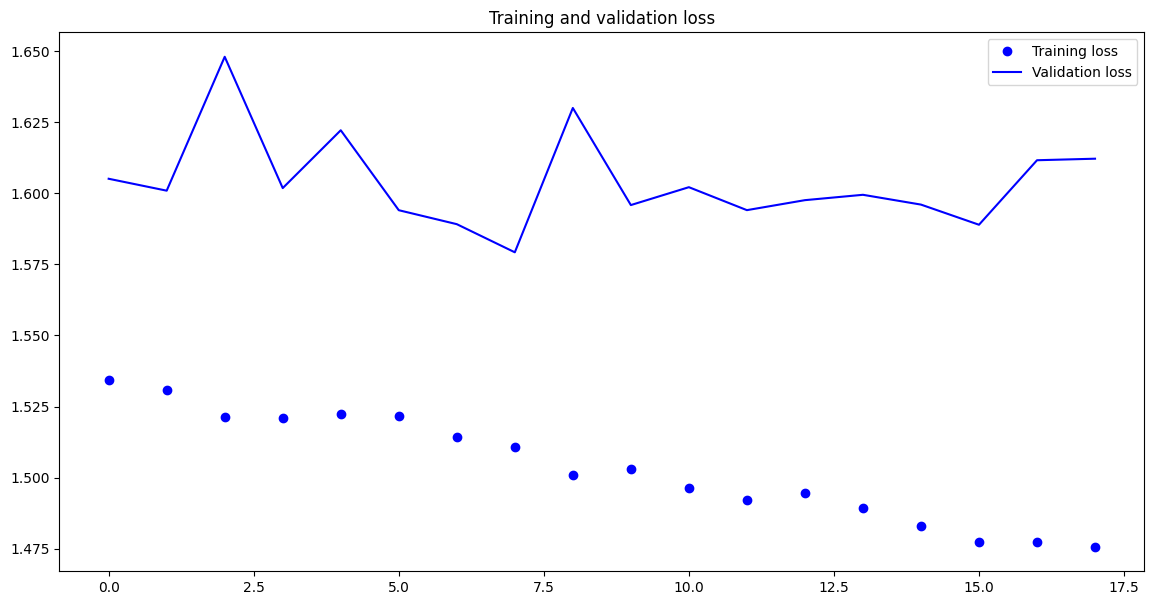

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred_es = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_es.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.4234

In [ ]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[517,  74,  36,  38,  17,  39,  16,  45, 169,  49],
       [ 36, 655,  10,  36,   8,  21,  15,  24,  75, 120],
       [117,  56, 218, 104, 125, 134, 111,  79,  35,  21],
       [ 37,  74,  51, 278,  36, 260, 117,  56,  47,  44],
       [ 82,  41, 105,  73, 299, 112, 150,  84,  36,  18],
       [ 26,  54,  61, 206,  58, 391,  79,  55,  47,  23],
       [ 11,  69,  50, 126, 107, 129, 446,  23,  16,  23],
       [ 52,  54,  44,  66,  92, 116,  33, 451,  23,  69],
       [144, 130,   7,  28,   7,  38,   6,  12, 562,  66],
       [ 49, 317,   6,  43,  10,  20,  21,  42,  75, 417]])

## Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [ ]:
rede_dropout = Sequential()
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,  input_dim = 784))
rede_dropout.add(Activation('sigmoid'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(25))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [ ]:
historico = rede_dropout.fit(x_treino,
                             y_treino,
                             epochs = 150,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1829 - accuracy: 0.1527 - val_loss: 2.0552 - val_accuracy: 0.1902
Epoch 2/150
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0984 - accuracy: 0.1763 - val_loss: 2.0445 - val_accuracy: 0.1938
Epoch 3/150
1250/1250 [==============================] - 4s 4ms/step - loss: 2.0687 - accuracy: 0.2012 - val_loss: 1.9903 - val_accuracy: 0.2535
Epoch 4/150
1250/1250 [==============================] - 6s 4ms/step - loss: 2.0458 - accuracy: 0.2160 - val_loss: 1.9949 - val_accuracy: 0.2174
Epoch 5/150
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0289 - accuracy: 0.2262 - val_loss: 1.9824 - val_accuracy: 0.2648
Epoch 6/150
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0154 - accuracy: 0.2325 - val_loss: 1.9422 - val_accuracy: 0.2775
Epoch 7/150
1250/1250 [==============================] - 6s 4ms/step - loss: 2.0020 - accuracy: 0.2450 - val_loss: 1.9177 - val_ac

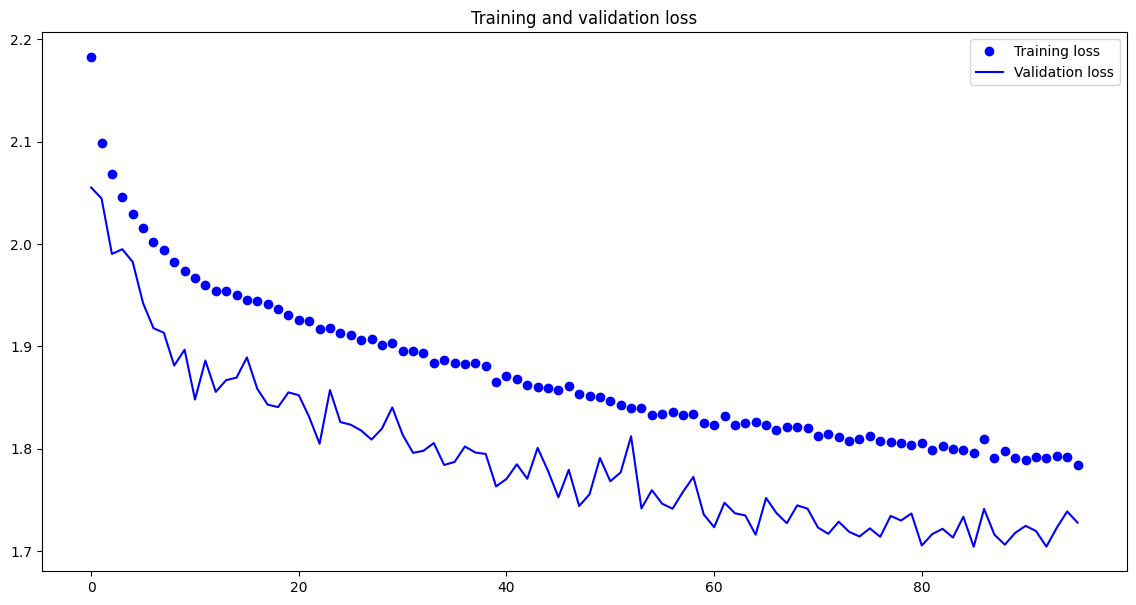

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred_dropout = rede_dropout.predict(x_test)
accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.3856

In [ ]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[426,  38,  79,  42,  41,  27,  43,  91, 181,  32],
       [ 28, 498,   6,  38,  25,  41,  58,  52,  90, 164],
       [ 88,  33,  61,  43, 359,  82, 201,  94,  23,  16],
       [ 14,  43,  23,  63, 142, 308, 249,  86,  22,  50],
       [ 57,  19,  27,  23, 484,  65, 182, 112,  20,  11],
       [ 15,  29,  20,  39, 204, 363, 212,  68,  28,  22],
       [  2,  42,   8,  32, 204,  82, 583,  27,   6,  14],
       [ 39,  25,  13,  30, 209,  81,  86, 459,  19,  39],
       [138,  82,  12,  39,  17,  53,  28,  30, 526,  75],
       [ 51, 213,   3,  49,  17,  22,  61,  80, 111, 393]])

# Regressão

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape,

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
historico = model.fit(x_treino,
                             y_treino,
                             epochs = 150,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
6/6 [==============================] - 1s 39ms/step - loss: 574.8440 - mae: 22.1675 - val_loss: 499.2415 - val_mae: 20.0823
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 522.5961 - mae: 20.9976 - val_loss: 459.8315 - val_mae: 19.0130
Epoch 3/150
6/6 [==============================] - 0s 8ms/step - loss: 479.6523 - mae: 19.9277 - val_loss: 420.1971 - val_mae: 17.9344
Epoch 4/150
6/6 [==============================] - 0s 9ms/step - loss: 434.3300 - mae: 18.8004 - val_loss: 371.7312 - val_mae: 16.6134
Epoch 5/150
6/6 [==============================] - 0s 8ms/step - loss: 381.4442 - mae: 17.4583 - val_loss: 327.6252 - val_mae: 15.3828
Epoch 6/150
6/6 [==============================] - 0s 11ms/step - loss: 332.5550 - mae: 16.0783 - val_loss: 282.4150 - val_mae: 14.2086
Epoch 7/150
6/6 [==============================] - 0s 10ms/step - loss: 282.3151 - mae: 14.6080 - val_loss: 236.6574 - val_mae: 12.8923
Epoch 8/150
6/6 [==============================] - 0

In [ ]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
mean_absolute_error(y_test, pred_simples)

2.9935626170214484

In [ ]:
resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = pred_simples

resultado

,y_test,y_pred
0,7.2,9.266814
1,18.8,17.310493
2,19.0,20.291138
3,27.0,31.582066
4,22.2,25.549246
...,...,...
97,21.9,52.345173
98,24.1,27.116039
99,50.0,47.027939
100,26.7,31.731396
